In [27]:
import pandas as pd
import numpy as np
df_salary = pd.read_csv(r'C:\DataSet\employees.csv')
df_salary

,Name,Department,Manager,Salary
0,Robin Hood,NaN,NaN,200
1,Arsene Wenger,Bar,Friar Tuck,50
2,Friar Tuck,Foo,Robin Hood,100
3,Little John,Foo,Robin Hood,100
4,Sam Allardyce,NaN,NaN,250
5,Dimi Berbatov,Foo,Little John,50


In [4]:

df_salary.isnull().sum()

Name          0
Department    2
Manager       2
Salary        0
dtype: int64

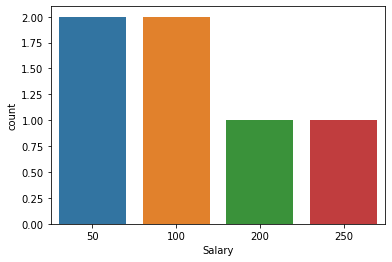

In [9]:
#Lets
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Salary",data=df_salary)
plt.show()

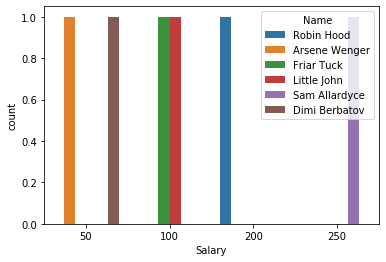

In [12]:
sns.countplot(x="Salary",hue="Name",data=df_salary)
plt.show()

In [13]:

#Let's now divide the dataset into input and output
df_x=df_salary.drop(columns=["Salary"])
y=df_salary[["Salary"]]

In [14]:

#we will convert the input into into integers using get_dummies
df_x=pd.get_dummies(df_x,drop_first=True)

In [15]:
#lets chcek the shape
df_x.shape

(6, 8)

In [21]:
df_salary.dtypes

Name          object
Department    object
Manager       object
Salary         int64
dtype: object

In [22]:
df_salary.describe

<bound method NDFrame.describe of             Name Department      Manager  Salary
0     Robin Hood        NaN          NaN     200
1  Arsene Wenger        Bar   Friar Tuck      50
2     Friar Tuck        Foo   Robin Hood     100
3    Little John        Foo   Robin Hood     100
4  Sam Allardyce        NaN          NaN     250
5  Dimi Berbatov        Foo  Little John      50>

In [16]:
#Lets bring input dataset features to same scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

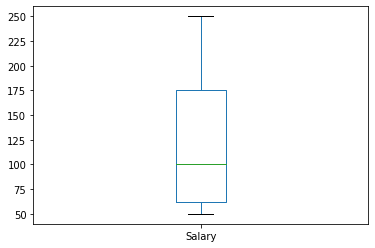

In [23]:
df_salary['Salary'].plot.box()

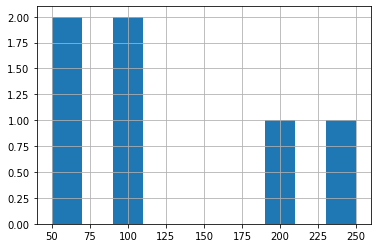

In [25]:
df_salary['Salary'].hist()

In [29]:
df_salary.skew()

Salary    0.811441
dtype: float64

In [37]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.4472136 , -0.4472136 , -0.4472136 ,  2.23606798, -0.4472136 ,
        -1.        , -0.4472136 , -0.70710678],
       [-0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,
        -1.        , -0.4472136 , -0.70710678],
       [-0.4472136 ,  2.23606798, -0.4472136 , -0.4472136 , -0.4472136 ,
         1.        , -0.4472136 ,  1.41421356],
       [-0.4472136 , -0.4472136 ,  2.23606798, -0.4472136 , -0.4472136 ,
         1.        , -0.4472136 ,  1.41421356],
       [-0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,  2.23606798,
        -1.        , -0.4472136 , -0.70710678],
       [ 2.23606798, -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,
         1.        ,  2.23606798, -0.70710678]])

In [38]:

#lets use labelencoder to convert target class into integers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

array([2, 0, 1, 1, 3, 0], dtype=int64)

In [39]:
#modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("random state :",r_state," and f1 score: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        rs=r_state
print("maximum f1_score is at random state :",rs," and it is :",max_r_score)

random state : 42  and f1 score:  -0.9271583557128897
random state : 43  and f1 score:  0.44955170595155935
random state : 44  and f1 score:  -7.471397442234455
random state : 45  and f1 score:  -7.15885997259142
random state : 46  and f1 score:  -7.158859972591433
random state : 47  and f1 score:  -7.158859972591424
random state : 48  and f1 score:  -3.6178493605586137
random state : 49  and f1 score:  -3.6178493605586173
random state : 50  and f1 score:  -3.617849360558618
random state : 51  and f1 score:  -3.6178493605586155
random state : 52  and f1 score:  -7.471397442234464
random state : 53  and f1 score:  -24.999999999999993
random state : 54  and f1 score:  -25.0
random state : 55  and f1 score:  -0.0042385525173611605
random state : 56  and f1 score:  -7.158859972591424
random state : 57  and f1 score:  -7.158859972591424
random state : 58  and f1 score:  -3.6178493605586146
random state : 59  and f1 score:  -7.471397442234462
random state : 60  and f1 score:  -25.0
random st

In [49]:
#cross-val
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=3,scoring="r2").mean()

-0.4625923051864495

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 20,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [51]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("r2 score is :",r2_score(y_test,y_pred))
print("RME is : ",np.sqrt(mean_squared_error(y_test,y_pred)))


r2 score is : -0.0042385525173611605
RME is :  1.5031755530090498


In [52]:
from sklearn.externals import joblib
joblib.dump(lr,'salary.pkl')

C:\Users\605822\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['salary.pkl']